<center><img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0103EN-SkillsNetwork/labs/module%201/images/IDSNlogo.png" width = 250></center>

<h1 align=center><font size = 5>Hands-on Lab: Creating and Querying Database Objects from R</h1>


<br>


### Welcome!


In this hands-on lab, we will create and query database objects from an R notebook in Jupyter, and use ggplot2 to plot the data using R libraries.


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Tasks</h3>
<ol><ol><ol>
<li><a href="#ref4a">Pre-requisites & Dataset</a></li>
<li><a href="#ref4b">Load RODBC</a></li>
<li><a href="#ref4c">Create a database connection</a></li>
<li><a href="#ref4d">Create a connection string and connect to the database</a></li>
<li><a href="#ref4e">View database and driver information</a></li>
<li><a href="#ref4f">Create the tables</a></li>
<li><a href="#ref4g">Load data into the database</a></li>
<li><a href="#ref4h">Fetch data from the database</a></li>
<li><a href="#ref4i">Plot the data (using ggplot2)</a></li>
<li><a href="#ref4j">Dis-connect</a></li>
</ol></ol></ol>
<br>
Estimated Time Needed: <strong>30 min</strong>
</div>


<a id="ref4a"></a>

### a. Pre-requisites & Dataset

**Pre-requisite**: In this lab we will use Jupyter Notebooks within SN Labs to access data in a Db2 on Cloud database using RODBC.  Information about Jupyter notebooks, SN Labs, and Db2 services is provided in the previous labs.

**Dataset used in this lab**: For this lab we will utilize the Ontario public schools enrollment dataset. This data set is available under the Open Government License – Ontario and sourced from: [https://www.ontario.ca/data/ontario-public-schools-enrolment](https://www.ontario.ca/data/ontario-public-schools-enrolment?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0103ENSkillsNetwork23619267-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-RP0103EN-SkillsNetwork-23619267\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ)

For simplicity we have already split it into two separate files: [board.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0103EN-SkillsNetwork/labs/Lab%20-%20Creating%20and%20Querying%20Database%20Objects%20from%20R/board.csv) and [school.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0103EN-SkillsNetwork/labs/Lab%20-%20Creating%20and%20Querying%20Database%20Objects%20from%20R/school.csv).

Prior to starting the lab, ensure the data set files are present in the "/resources/data/samples/osb/" folder under My Data.


<a id="ref4b"></a>

### b. Load RODBC

The RODBC package and the ODBC driver for Db2 are pre-installed on your workbench. Let’s load the RODBC package by clicking on the following cell and executing it (Shift+Enter):


In [1]:
library(RODBC);

<a id="ref4c"></a>

### c. Create a database connection


In [2]:
dsn_driver <- "{IBM DB2 ODBC Driver}"
dsn_database <- "bludb"            # e.g. "bludb"
dsn_hostname <- "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud" # e.g "54a2f15b-5c0f-46df-8954-.databases.appdomain.cloud"
dsn_port <- "32733"   # e.g. "32733" 
dsn_protocol <- "TCPIP"            # i.e. "TCPIP"
dsn_uid <- "mbx73142"        # e.g. "zjh17769"
dsn_pwd <- "qUmKL2e8KKTIvHxS"      # e.g. "zcwd4+8gbq9bm5k4"  
dsn_security <- "ssl"

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the <...>
dsn_driver <- "{...}"
dsn_database <- "..."            
dsn_hostname <- "<Enter Hostname>" 
dsn_port <- "..."                
dsn_protocol <- "..."            
dsn_uid <- "<Enter UserID>"        
dsn_pwd <- "<Enter Password>" 
dsn_security <- "ssl"
           
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
dsn_driver <- "{IBM DB2 ODBC Driver}"
dsn_database <- "bludb"            # e.g. "bludb"
dsn_hostname <- "<Enter Hostname>" # e.g "54a2f15b-5c0f-46df-8954-.databases.appdomain.cloud"
dsn_port <- "<Enter port number"   # e.g. "32733" 
dsn_protocol <- "TCPIP"            # i.e. "TCPIP"
dsn_uid <- "<Enter UserID>"        # e.g. "zjh17769"
dsn_pwd <- "<Enter Password>"      # e.g. "zcwd4+8gbq9bm5k4"  
dsn_security <- "ssl"
```

</details>


<a id="ref4d"></a>

### d. Create a connection string and connect to the database


In [3]:
conn_path <- paste("DRIVER=",dsn_driver,
                  ";DATABASE=",dsn_database,
                  ";HOSTNAME=",dsn_hostname,
                  ";PORT=",dsn_port,
                  ";PROTOCOL=",dsn_protocol,
                  ";UID=",dsn_uid,
                  ";PWD=",dsn_pwd,
                  ";SECURITY=",dsn_security,        
                    sep="")
conn <- odbcDriverConnect(conn_path)
conn

RODBC Connection 1
Details:
  case=nochange
  DRIVER={IBM DB2 ODBC DRIVER}
  UID=mbx73142
  PWD=******
  DATABASE=bludb
  HOSTNAME=54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud
  PORT=32733
  PROTOCOL=TCPIP
  SECURITY=SSL

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
conn_path <- paste("DRIVER=",...
                  ";DATABASE=",...
                  ";HOSTNAME=",...
                  ";PORT=",...
                  ";PROTOCOL=",...
                  ";UID=",...
                  ";PWD=",..."
                  ";SECURITY=",...")
conn <- odbcDriverConnect(conn_path)
conn
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
conn_path <- paste("DRIVER=",dsn_driver,
                  ";DATABASE=",dsn_database,
                  ";HOSTNAME=",dsn_hostname,
                  ";PORT=",dsn_port,
                  ";PROTOCOL=",dsn_protocol,
                  ";UID=",dsn_uid,
                  ";PWD=",dsn_pwd,
                  ";SECURITY=",dsn_security,        
                    sep="")
conn <- odbcDriverConnect(conn_path)
conn
```

</div>


<a id="ref4e"></a>

### e. View database and driver information


In [4]:
#View database and driver information
sql.info <- sqlTypeInfo(conn)
conn.info <- odbcGetInfo(conn)
conn.info["DBMS_Name"]
conn.info["DBMS_Ver"]
conn.info["Driver_ODBC_Ver"]

DBMS_Name 
"DB2/LINUXX8664"

DBMS_Ver 
"11.05.0600"

Driver_ODBC_Ver 
        "03.51"

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
sql.... <- sql...(conn)
conn.... <- odbc...(conn)
conn....["..._Name"]
conn....["..._Ver"]
conn....["Driver_..._Ver"]
conn
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
#View database and driver information
sql.info <- sqlTypeInfo(conn)
conn.info <- odbcGetInfo(conn)
conn.info["DBMS_Name"]
conn.info["DBMS_Ver"]
conn.info["Driver_ODBC_Ver"]
```

</details>


<a id="ref4f"></a>

### f. Create the tables

You will need to *remove* the BOARD and SCHOOL tables in case they already exist. <br>
**Note: Your Db2 non-system Schema name is your userID/username in uppercase used in creating database connection.**


In [5]:
myschema <- "MBX73142" # e.g. "ZJH17769"
tables <- c("BOARD", "SCHOOL")
    
    for (table in tables){  
      # Drop School table if it already exists
      out <- sqlTables(conn, tableType = "TABLE", schema = myschema, tableName =table)
      if (nrow(out)>0) {
        err <- sqlDrop (conn, paste(myschema,".",table,sep=""), errors=FALSE)  
        if (err==-1){
          cat("An error has occurred.\n")
          err.msg <- odbcGetErrMsg(conn)
          for (error in err.msg) {
            cat(error,"\n")
          }
        } else {
          cat ("Table: ",  myschema,".",table," was dropped\n")
        }
      } else {
          cat ("Table: ",  myschema,".",table," does not exist\n")
      }
    }

Table:  MBX73142 . BOARD  was dropped
Table:  MBX73142 . SCHOOL  was dropped


<details>
<summary>Click here to view/hide hint</summary>
<p>

```
myschema <- "..."
tables <- c("...", "...L")
    
    for (table in ...){  
      # Drop ... table if it already exists
      out <- sql...(conn, table... = "...", schema = my..., ...Name =table)
      if (nrow(...)>0) {
        err <- sql... (conn, paste(my...,".",...,...=""), errors=...)  
        if (err==-1){
          ...("An error has occurred.\n")
          err.... <- odbc...Msg(conn)
          for (error in ....msg) {
            cat(...,"\n")
          }
        } else {
          cat ("...: ",  my...,".",table," was ...\n")
        }
      } else {
          cat ("...: ",  my...,".",table," does not ...\n")
      }
    }
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
myschema <- "<Enter Schema>" # e.g. "ZJH17769"
tables <- c("BOARD", "SCHOOL")
    
    for (table in tables){  
      # Drop School table if it already exists
      out <- sqlTables(conn, tableType = "TABLE", schema = myschema, tableName =table)
      if (nrow(out)>0) {
        err <- sqlDrop (conn, paste(myschema,".",table,sep=""), errors=FALSE)  
        if (err==-1){
          cat("An error has occurred.\n")
          err.msg <- odbcGetErrMsg(conn)
          for (error in err.msg) {
            cat(error,"\n")
          }
        } else {
          cat ("Table: ",  myschema,".",table," was dropped\n")
        }
      } else {
          cat ("Table: ",  myschema,".",table," does not exist\n")
      }
    }
```

</details>


Let’s create the BOARD table in the database.


In [6]:
df1 <- sqlQuery(conn, "CREATE TABLE BOARD (
                            B_ID CHAR(6) NOT NULL, 
                            B_NAME VARCHAR(75) NOT NULL, 
                            TYPE VARCHAR(50) NOT NULL, 
                            LANGUAGE VARCHAR(50), 
                            PRIMARY KEY (B_ID))", 
                errors=FALSE)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
df1 <- sql...(conn, "CREATE ... BOARD (
                            B_ID ...(6) NOT ..., 
                            B_NAME ...(75) NOT ..., 
                            TYPE ...(50) NOT ..., 
                            LANGUAGE ...(50), 
                            ... KEY (B_ID))", 
                ...=FALSE)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
df1 <- sqlQuery(conn, "CREATE TABLE BOARD (
                            B_ID CHAR(6) NOT NULL, 
                            B_NAME VARCHAR(75) NOT NULL, 
                            TYPE VARCHAR(50) NOT NULL, 
                            LANGUAGE VARCHAR(50), 
                            PRIMARY KEY (B_ID))", 
                errors=FALSE)
```

</details>


Check if successful


In [7]:
if (df1 == -1){
  cat ("An error has occurred.\n")
  msg <- odbcGetErrMsg(conn)
  print (msg)
} else {
  cat ("Table was created successfully.\n")
}

Table was created successfully.


<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
if (... == -1){
  cat ("An ... has occurred.\n")
  msg <- odbc...Msg(conn)
  print (...)
} else {
  cat ("Table was ... ....\n")
}
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
if (df1 == -1){
  cat ("An error has occurred.\n")
  msg <- odbcGetErrMsg(conn)
  print (msg)
} else {
  cat ("Table was created successfully.\n")
}
```

</details>


Now let’s create the SCHOOL table.


In [8]:
df2 <- sqlQuery(conn, "CREATE TABLE SCHOOL (
                  B_ID CHAR(6) NOT NULL, 
                  S_ID CHAR(6) NOT NULL, 
                  S_NAME VARCHAR(100), 
                  LEVEL VARCHAR(70), 
                  ENROLLMENT INTEGER WITH DEFAULT 10,
                  PRIMARY KEY (B_ID, S_ID))", errors=FALSE)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
df2 <- sql...(conn, "CREATE ... SCHOOL (
                  B_ID ...(6) NOT NULL, 
                  S_ID ...(6) NOT NULL, 
                  S_NAME ...(100), 
                  LEVEL ...(70), 
                  ENROLLMENT ... WITH ... 10,
                  PRIMARY ... (B_ID, S_ID))", ...=FALSE)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
df2 <- sqlQuery(conn, "CREATE TABLE SCHOOL (
                  B_ID CHAR(6) NOT NULL, 
                  S_ID CHAR(6) NOT NULL, 
                  S_NAME VARCHAR(100), 
                  LEVEL VARCHAR(70), 
                  ENROLLMENT INTEGER WITH DEFAULT 10,
                  PRIMARY KEY (B_ID, S_ID))", errors=FALSE)
```

</details>


Check if successful.


In [9]:
if (df2 == -1){
  cat ("An error has occurred.\n")
  msg <- odbcGetErrMsg(conn)
  print (msg)
} else {
  cat ("Table was created successfully.\n")
}

Table was created successfully.


<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
if (... == -1){
  cat ("An ... has occurred.\n")
  msg <- odbc...Msg(conn)
  print (...)
} else {
  cat ("Table was ... ....\n")
}
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
if (df2 == -1){
  cat ("An error has occurred.\n")
  msg <- odbcGetErrMsg(conn)
  print (msg)
} else {
  cat ("Table was created successfully.\n")
}
```

</details>


<a id="ref4g"></a>

### g. Load the data into the database


Fetch the tables present in the current database schema.


In [10]:
tab.frame <- sqlTables(conn, schema=myschema)
nrow(tab.frame)
tab.frame$TABLE_NAME

[1] 30

[1] "BANKACCOUNTS"                      "BIKE_SHARING_SYSTEMS"             
 [3] "BOARD"                             "CENSUS_DATA"                      
 [5] "CHICAGO_CRIME_DATA"                "CHICAGO_PUBLIC_SCHOOLS"           
 [7] "CHICAGO_SOCIOECONOMIC_DATA"        "CITIES_WEATHER_FORECAST"          
 [9] "CROP_DATA"                         "DAILY_FX"                         
[11] "DEPARTMENTS"                       "EMPLOYEES"                        
[13] "FARM_PRICES"                       "INSTRUCTOR"                       
[15] "INTERNATIONAL_STUDENT_TEST_SCORES" "JOBS"                             
[17] "JOB_HISTORY"                       "LOCATIONS"                        
[19] "MONTHLY_FX"                        "PET"                              
[21] "PETRESCUE"                         "PETSALE"                          
[23] "SCHOOL"                            "SCHOOLS"                          
[25] "SEOUL_BIKE_SHARING"                "SHOESHOP"                         
[27] "SPACEXTBL"                         "WORLD_CITIES"                     
[29] "EMPSALARY"                         "ICON"

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
tab.... <- sql...(conn, ...=myschema)
n...(tab....)
tab....$..._NAME
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
tab.frame <- sqlTables(conn, schema=myschema)
nrow(tab.frame)
tab.frame$TABLE_NAME
```

</details>


Print column 4, 6, 7, 18 details for the tables BOARD and SCHOOL


In [11]:
for (table in tables){  
        cat ("\nColumn info for table", table, ":\n")
        col.detail <- sqlColumns(conn, table)
        print(col.detail[c(4,6,7,18)], row.names=FALSE)
}


Column info for table BOARD :
 COLUMN_NAME TYPE_NAME COLUMN_SIZE IS_NULLABLE
        B_ID      CHAR           6          NO
      B_NAME   VARCHAR          75          NO
        TYPE   VARCHAR          50          NO
    LANGUAGE   VARCHAR          50         YES

Column info for table SCHOOL :
 COLUMN_NAME TYPE_NAME COLUMN_SIZE IS_NULLABLE
        B_ID      CHAR           6          NO
        S_ID      CHAR           6          NO
      S_NAME   VARCHAR         100         YES
       LEVEL   VARCHAR          70         YES
  ENROLLMENT   INTEGER          10         YES


<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
for (table in ...){  
        cat ("\n... info for table", ..., ":\n")
        col.detail <- sqlColumns(conn, ...)
        print(col....[c(4,6,7,18)], row....=FALSE)
}
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
for (table in tables){  
        cat ("\nColumn info for table", table, ":\n")
        col.detail <- sqlColumns(conn, table)
        print(col.detail[c(4,6,7,18)], row.names=FALSE)
}
```

</details>


Load the data from the board.csv into the BOARD dataframe.


In [12]:
boarddf <- read.csv("/resources/board.csv", header = FALSE)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
board... <- ....csv("/resources/.../samples/.../board.csv", header = ...)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
boarddf <- read.csv("/resources/data/samples/osb/board.csv", header = FALSE)
```

</details>


Display initial data from the BOARD dataframe.


In [13]:
head(boarddf)

,V1,V2,V3,V4
,<fct>,<fct>,<fct>,<fct>
1,B28010,Algoma DSB,Public,English
2,B67202,Algonquin and Lakeshore CDSB,Roman Catholic,English
3,B66010,Avon Maitland DSB,Public,English
4,B66001,Bluewater DSB,Public,English
5,B67164,Brant Haldimand Norfolk CDSB,Roman Catholic,English
6,B67008,Bruce-Grey CDSB,Roman Catholic,English


<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
...(board...)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
head(boarddf)
```

</details>


Save the dataframe to the database table BOARD.


In [14]:
sqlSave(conn, boarddf, "BOARD", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE, verbose=FALSE)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
sql...(conn, ...df, "BOARD", ...=TRUE, ...=FALSE, row...=FALSE, col...=FALSE)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
sqlSave(conn, boarddf, "BOARD", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE, verbose=FALSE)
```

</details>


Load the data from the school.csv into the SCHOOL dataframe


In [15]:
schooldf <- read.csv("/resources/school.csv", header = FALSE)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
school... <- ....csv("/resources/.../samples/osb/....csv", ... = FALSE)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
schooldf <- read.csv("/resources/data/samples/osb/school.csv", header = FALSE)
```

</details>


Display some records from the beginning of the SCHOOL dataframe.


In [16]:
head(schooldf)

,V1,V2,V3,V4,V5
,<fct>,<int>,<fct>,<fct>,<int>
1,B28010,891240,Alexander Henry HS,Secondary,145
2,B28010,902344,Algoma Education Connection SS,Secondary,385
3,B28010,19186,Anna McCrea PS,Elementary,177
4,B28010,67679,Arthur Henderson PS,Elementary,104
5,B28010,28932,Aweres PS,Elementary,95
6,B28010,43362,Ben R McMullin PS,Elementary,241


<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
...(school...)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
head(schooldf)
```

</details>


Change the encoding of the 3rd column character vector from latin1 to ASCII//TRANSLIT


In [17]:
schooldf$V3 <- iconv(schooldf$V3, "latin1", "ASCII//TRANSLIT")

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
...df$V3 <- i...(...df$V3, "latin1", "ASCII//TRANSLIT")
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
schooldf$V3 <- iconv(schooldf$V3, "latin1", "ASCII//TRANSLIT")
```

</details>


Save the dataframe to the database table SCHOOL.


In [18]:
#NOTE: This may take a long time because of the large size of the database. When there is lot of data to insert in the database it may be faster to use the native LOAD utility of the database instead of through R.

sqlSave(conn, schooldf, "SCHOOL", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE, verbose=FALSE)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
sql...(conn, school..., "SCHOOL", append=..., fast=..., row...=FALSE, col...=FALSE)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
#NOTE: This may take a long time because of the large size of the database. When there is lot of data to insert in the database it may be faster to use the native LOAD utility of the database instead of through R.

sqlSave(conn, schooldf, "SCHOOL", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE, verbose=FALSE)
```

</details>


<a id="ref4h"></a>

### h. Fetch data from the database


Fetch the data from the database table BOARD and display some rows from the end of the data.


In [19]:
boarddb <- sqlFetch(conn, "BOARD")
tail(boarddb)

,B_ID,B_NAME,TYPE,LANGUAGE
,<fct>,<fct>,<fct>,<fct>
71,B67148,Waterloo CDSB,Roman Catholic,English
72,B66176,Waterloo Region DSB,Public,English
73,B67130,Wellington CDSB,Roman Catholic,English
74,B67024,Windsor-Essex CDSB,Roman Catholic,English
75,B67075,York CDSB,Roman Catholic,English
76,B66095,York Region DSB,Public,English


<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
...db <- sql...(conn, "...")
...(board...)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
boarddb <- sqlFetch(conn, "BOARD")
tail(boarddb)
```

</details>


Fetch the data from the database table SCHOOL and and display some rows from the end of the data.


In [20]:
schooldb <- sqlFetch(conn, "SCHOOL")
tail(schooldb)

,B_ID,S_ID,S_NAME,LEVEL,ENROLLMENT
,<fct>,<int>,<fct>,<fct>,<int>
4894,B66095,634565,Windham Ridge PS,Elementary,846
4895,B66095,549380,Wismer PS,Elementary,511
4896,B66095,954292,Woodbridge College,Secondary,985
4897,B66095,617318,Woodbridge PS,Elementary,504
4898,B66095,618896,Woodland PS,Elementary,442
4899,B66095,624101,Yorkhill E S,Elementary,293


<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
...db <- sql...(conn, "...")
tail(...db)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
schooldb <- sqlFetch(conn, "SCHOOL")
tail(schooldb)
```

</details>


<a id="ref4i"></a>

### i. Plot the data (using ggplot2)


In [21]:
library(ggplot2);

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
...(gg...2);
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
library(ggplot2);
```

</details>


Get the elementary school data from the database from both tables in descending sequence.


In [22]:
elequery <- query <- paste("select s.enrollment as ENROLLMENT 
from school s, board b 
where b.b_name = 'Toronto DSB' and b.b_id=s.b_id 
and s.level = 'Elementary' 
order by enrollment desc")

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
...query <- ... <- paste("... s.enrollment as ... 
from ... s, ... b 
where b.b_... = 'Toronto DSB' and b.b_id=s.... 
and ....level = 'Elementary' 
order by ... desc")
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
elequery <- query <- paste("select s.enrollment as ENROLLMENT 
from school s, board b 
where b.b_name = 'Toronto DSB' and b.b_id=s.b_id 
and s.level = 'Elementary' 
order by enrollment desc")
```

</details>


create the elementary school dataframe.


In [23]:
eledf <- sqlQuery(conn, elequery)
dim(eledf)

[1] 476   1

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
ele... <- sql...(conn, ...query)
dim(...df)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
eledf <- sqlQuery(conn, elequery)
dim(eledf)
```

</details>


Create a density plot of elementary school enrollments.


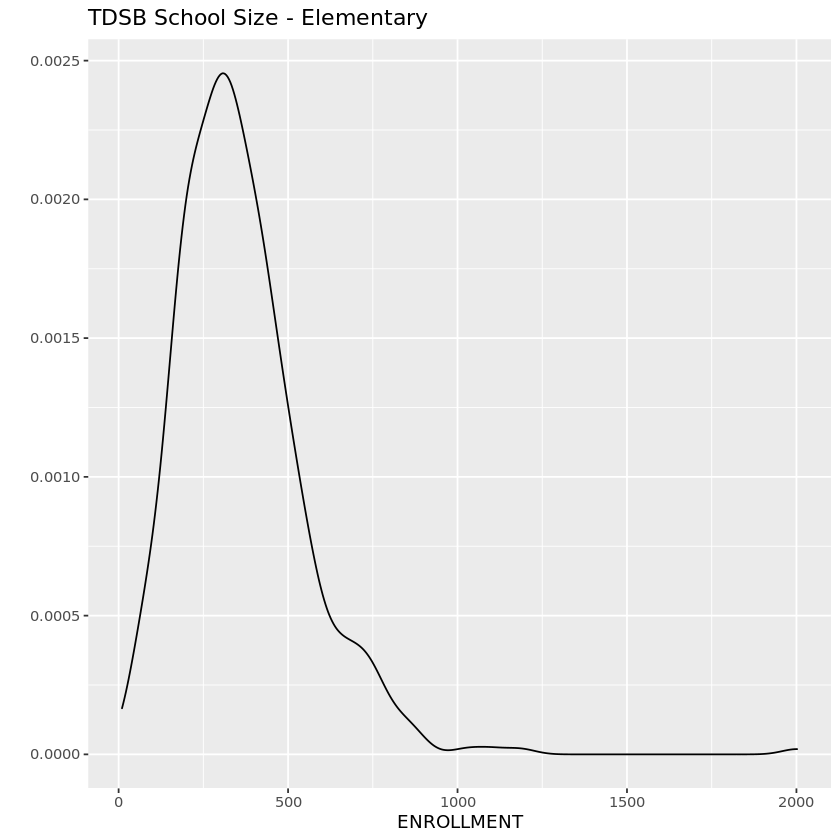

In [24]:
qplot(ENROLLMENT, data=eledf, geom="density",  main="TDSB School Size - Elementary")

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
q...(ENROLLMENT, ...=eledf, ...="density",  ...="TDSB School Size - ...")
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
qplot(ENROLLMENT, data=eledf, geom="density",  main="TDSB School Size - Elementary")
```

</details>


Create the secondary school enrollments query in descending sequence.


In [25]:
secquery <- paste("select s.enrollment as ENROLLMENT 
from school s, board b 
where b.b_name = 'Toronto DSB' and b.b_id=s.b_id 
and s.level = 'Secondary' 
order by enrollment desc")

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
sec... <- paste("... s.enrollment as ... 
from ... s, board b 
where b.b_... = 'Toronto ...' and b.b_id=s.... 
and s.... = 'Secondary' 
order by ... desc")
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
secquery <- paste("select s.enrollment as ENROLLMENT 
from school s, board b 
where b.b_name = 'Toronto DSB' and b.b_id=s.b_id 
and s.level = 'Secondary' 
order by enrollment desc")
```

</details>


Create the dataframe using the data in the database.


In [26]:
secdf <- sqlQuery(conn, secquery)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
secdf <- sql...(conn, sec...)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
secdf <- sqlQuery(conn, secquery)
```

</details>


Create a density plot of secondary school enrollments.


Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

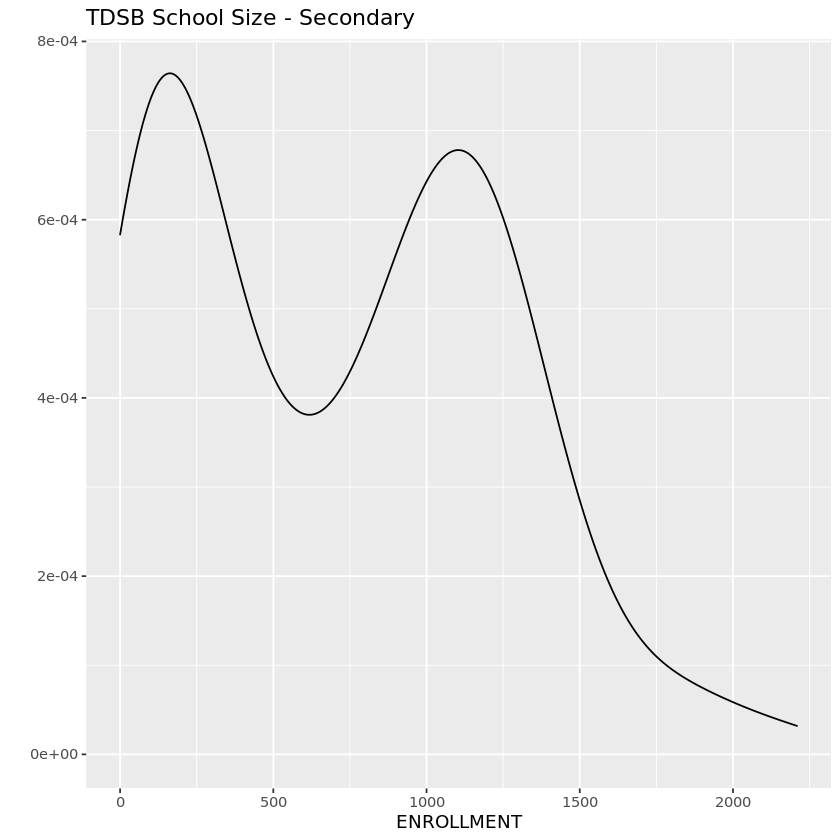

In [27]:
qplot(ENROLLMENT, data=secdf, geom="density", main="TDSB School Size - Secondary")

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
q...(ENROLLMENT, ...=secdf, ...="density", ...="TDSB School Size - ...")
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
qplot(ENROLLMENT, data=secdf, geom="density", main="TDSB School Size - Secondary")
```

</details>


Query the BOARD database for enrollments.


In [28]:
denquery <- paste("select b.b_name, s.s_name, level as LEVEL, enrollment 
 from board b, school s where b.b_id = s.b_id and b.b_name = 'Toronto DSB'")

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
den... <- paste("select b.b_..., s.s_..., level as ..., ... 
 from board b, ... s where b.... = s.b_id and b.b_... = 'Toronto DSB'")
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
denquery <- paste("select b.b_name, s.s_name, level as LEVEL, enrollment 
 from board b, school s where b.b_id = s.b_id and b.b_name = 'Toronto DSB'")
```

</details>


Query the database.


In [29]:
dendf <- sqlQuery(conn, denquery)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
d...f <- sql...(conn, den...)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
dendf <- sqlQuery(conn, denquery)
```

</details>


Create a box plot of enrollements in elementary and secondary schools in Toronto.


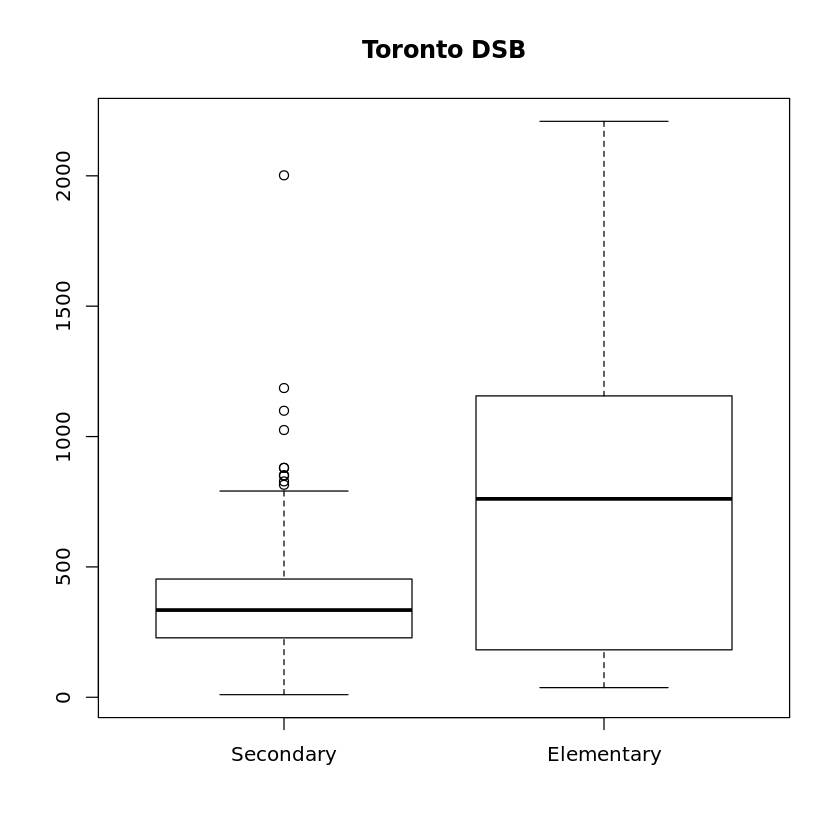

In [30]:
dendf$LEVEL <- as.factor(dendf$LEVEL)
boxplot(ENROLLMENT ~ LEVEL, dendf, names =c("Secondary","Elementary"), main="Toronto DSB")

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
d...f$LEVEL <- as....(d...f$LEVEL)
box...(ENROLLMENT ~ ..., d...f, names =c("...","..."), ...="Toronto DSB")
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
dendf$LEVEL <- as.factor(dendf$LEVEL)
boxplot(ENROLLMENT ~ LEVEL, dendf, names =c("Secondary","Elementary"), main="Toronto DSB")
```

</details>


<a id="ref4j"></a>

### j. Dis-connect

Finally, as a best practice we should close the database connection once we're done with it.


In [31]:
close(conn)

<details>
<summary>Click here to view/hide hint</summary>
<p>

```
# Fill in the ...
...(conn)
```

</details>


<details>
<summary>Click here to view/hide solution</summary>
<p>

```
close(conn)
```

</details>


<a id="ref4o"></a>

### Summary


In this lab you created and queried database objects from an R notebook in Jupyter, and you used ggplot2 to plot the data using R libraries.


<hr>


#### Thank you for completing this module on creating and querying database objects from R.


<hr>

## Authors

*   [Rav Ahuja](https://ca.linkedin.com/in/rav-ahuja-8aa4562a?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0103ENSkillsNetwork23619267-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-RP0103EN-SkillsNetwork-23619267\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ)
*   [Agatha Colangelo](https://www.linkedin.com/in/agathacolangelo?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0103ENSkillsNetwork23619267-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-RP0103EN-SkillsNetwork-23619267\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ)
*   [Sandip Saha Joy](https://www.linkedin.com/in/sandipsahajoy?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkRP0103ENSkillsNetwork23619267-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-RP0103EN-SkillsNetwork-23619267\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ)

## Changelog

| Date (YYYY-MM-DD) | Version | Changed By                   | Change Description                 |
| ----------------- | ------- | ---------------------------- | ---------------------------------- |
| 2021-07-14        | 2.1    | Lakshmi Holla            | Added ssl changes |
| 2021-01-22        | 2.0     | Sandip Saha Joy              | Created revised version of the lab |
| 2017              | 1.0     | Rav Ahuja & Agatha Colangelo | Created initial version of the lab |

<hr>

<h2 align=center><font size = 5>Copyright &copy; IBM Corporation 2017-2021. All rights reserved.</h2>
